# **Atlántico**

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [31]:
# Leer el archivo
df = pd.read_csv(r"C:\Users\Hp\DENGUE\Data\FinalData_Dengue\Dengue_ATL.csv", encoding='latin_1', low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35448 entries, 0 to 35447
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ano                 35448 non-null  int64  
 1   area                35448 non-null  int64  
 2   barrio              35075 non-null  object 
 3   edad_uni            35448 non-null  float64
 4   etnia               35448 non-null  int64  
 5   evento              35448 non-null  int64  
 6   fecha_consulta      35448 non-null  object 
 7   fecha_ini_sintomas  35448 non-null  object 
 8   fecha_notifica      35448 non-null  object 
 9   hospitalizacion     35448 non-null  int64  
 10  localidad           34035 non-null  object 
 11  muerte              35448 non-null  int64  
 12  municipio           35448 non-null  object 
 13  semana              35448 non-null  int64  
 14  sexo                35448 non-null  object 
 15  tipo_aseguradora    35448 non-null  object 
 16  tipo

## 1. Calidad de los datos

Revisión de valores faltantes por variable.

Tipos de variables (numéricas, categóricas, fechas).


In [32]:
# Lista de columnas que quieres convertir
columnas_fecha = ["fecha_consulta", "fecha_ini_sintomas", "fecha_notifica"]

for col in columnas_fecha:
    df[col] = pd.to_datetime(df[col], errors="raise", dayfirst=True)  
    # 👆 usa dayfirst=True si tus fechas están en formato DD/MM/YYYY
    print(f"Columna '{col}' convertida a datetime.")

Columna 'fecha_consulta' convertida a datetime.
Columna 'fecha_ini_sintomas' convertida a datetime.
Columna 'fecha_notifica' convertida a datetime.


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35448 entries, 0 to 35447
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ano                 35448 non-null  int64         
 1   area                35448 non-null  int64         
 2   barrio              35075 non-null  object        
 3   edad_uni            35448 non-null  float64       
 4   etnia               35448 non-null  int64         
 5   evento              35448 non-null  int64         
 6   fecha_consulta      35448 non-null  datetime64[ns]
 7   fecha_ini_sintomas  35448 non-null  datetime64[ns]
 8   fecha_notifica      35448 non-null  datetime64[ns]
 9   hospitalizacion     35448 non-null  int64         
 10  localidad           34035 non-null  object        
 11  muerte              35448 non-null  int64         
 12  municipio           35448 non-null  object        
 13  semana              35448 non-null  int64     

In [34]:
# Reemplazar el valor específico
df["municipio"] = df["municipio"].replace(
    "* ATLANTICO. MUNICIPIO DESCONO", "desconocido"
)

# Verificar
print(df["municipio"].unique())

['MALAMBO' 'BARRANQUILLA' 'CANDELARIA' 'SABANALARGA' 'PONEDERA'
 'CAMPO DE LA CRUZ' 'SOLEDAD' 'GALAPA' 'TUBARA' 'PALMAR DE VARELA'
 'MANATI' 'PUERTO COLOMBIA' 'JUAN DE ACOSTA' 'BARANOA' 'SUAN' 'POLO NUEVO'
 'SANTO TOMAS' 'SANTA LUCIA' 'USIACURI' 'SABANAGRANDE' 'PIOJO' 'LURUACO'
 'REPELON' 'desconocido']


In [35]:

# Definir columnas a excluir
excluir = ['edad_uni', 'localidad', 'barrio', 'fecha_consulta', 'fecha_ini_sintomas','fecha_notifica']

# Recorrer columnas
for col in df.columns:
    if col not in excluir:
        print(f"\n📌 Columna: {col}")
        print(df[col].unique())



📌 Columna: ano
[2024 2023 2022 2017 2021 2019 2018 2020]

📌 Columna: area
[1 2 3]

📌 Columna: etnia
[0 1]

📌 Columna: evento
[220 210]

📌 Columna: hospitalizacion
[1 0]

📌 Columna: muerte
[1 0]

📌 Columna: municipio
['MALAMBO' 'BARRANQUILLA' 'CANDELARIA' 'SABANALARGA' 'PONEDERA'
 'CAMPO DE LA CRUZ' 'SOLEDAD' 'GALAPA' 'TUBARA' 'PALMAR DE VARELA'
 'MANATI' 'PUERTO COLOMBIA' 'JUAN DE ACOSTA' 'BARANOA' 'SUAN' 'POLO NUEVO'
 'SANTO TOMAS' 'SANTA LUCIA' 'USIACURI' 'SABANAGRANDE' 'PIOJO' 'LURUACO'
 'REPELON' 'desconocido']

📌 Columna: semana
[31 12  3 25 24 35 20  9 33  6 34 41 47 29 21 44 42  2 52 38 50  7 16  5
  4 23 18 14  1 49 10 43 28 45 37 32 26 11 30 51 19 48  8 27 40 36 46 22
 39 13 17 15 53]

📌 Columna: sexo
['F' 'M']

📌 Columna: tipo_aseguradora
['C' 'S' 'P' 'I' 'N' 'E']

📌 Columna: tipo_caso
[3 2 5]

📌 Columna: uni_med_
[1 3 2]


In [36]:
# Valores faltantes por variable
faltantes = df.isnull().sum()
print("\n📊 Valores faltantes por variable:")
print(faltantes[faltantes > 0])


📊 Valores faltantes por variable:
barrio        373
localidad    1413
dtype: int64


## 2. Análisis univariado

In [37]:
# funcion para describir variables categoricas
def describir_categorica(columna):
    print(f"\n📌 Variable: {columna.name}")
    print(columna.value_counts(dropna=False))  # Incluye NaN en el conteo
    print("\nProporciones:")
    print(columna.value_counts(normalize=True, dropna=False))  # Proporciones incluyendo NaN
    print("\n-----------------------------------")

In [ ]:
# Tabla descriptivo de numericas
def describir_numerica(columna):
    print(f"\n📌 Variable: {columna.name}")
    print(f"Min {columna.min()}")
    print(f"Max{columna.max()}")
    print(columna.max())
    print(columna.mean())
    print(columna.std())
    print(columna.median())
    print("\n-----------------------------------")



### 2.1 Variables demográficas

Edad (distribución por grupos etarios).
Sexo.
Etnia.
Tipo de aseguradora.

In [ ]:
describir_categorica(df["sexo"])
describir_categorica(df["etnia"])
describir_categorica(df["tipo_aseguradora"])


📌 Variable: sexo
sexo
M    18648
F    16800
Name: count, dtype: int64

Proporciones:
sexo
M    0.526066
F    0.473934
Name: proportion, dtype: float64

-----------------------------------

📌 Variable: etnia
etnia
0    34872
1      576
Name: count, dtype: int64

Proporciones:
etnia
0    0.983751
1    0.016249
Name: proportion, dtype: float64

-----------------------------------

📌 Variable: tipo_aseguradora
tipo_aseguradora
S    17577
C    15637
P     1180
N      727
I      226
E      101
Name: count, dtype: int64

Proporciones:
tipo_aseguradora
S    0.495853
C    0.441125
P    0.033288
N    0.020509
I    0.006376
E    0.002849
Name: proportion, dtype: float64

-----------------------------------


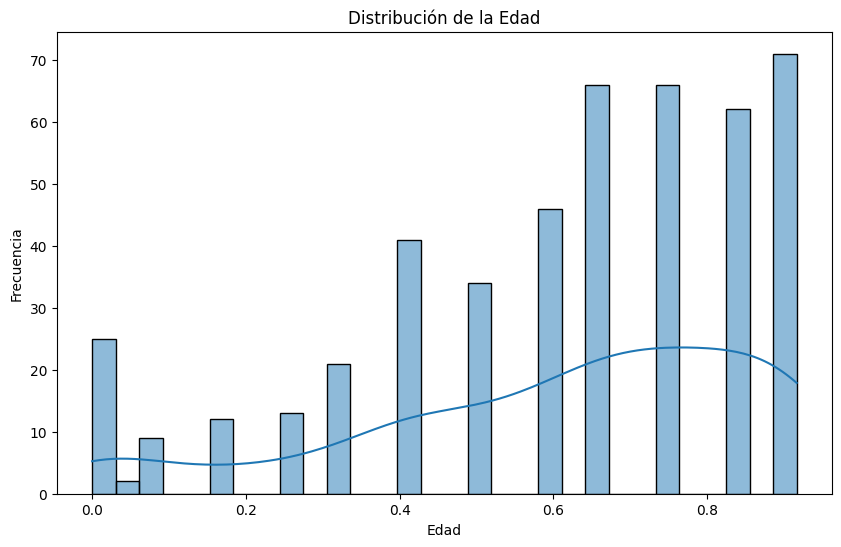

In [46]:
grupo_menores_1 = df[df['edad_uni'] < 1]
plt.figure(figsize=(10, 6))
sns.histplot(grupo_menores_1['edad_uni'], bins=30, kde=True)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

In [61]:
grupo_menores_1.shape[0]
prop = (grupo_menores_1.shape[0] / df.shape[0]) * 100
print(f"Número de casos menores de 1 año: {grupo_menores_1.shape[0]}")
print(f"Porcentaje de casos menores de 1 año: {prop:.2f}%")

describir_numerica(grupo_menores_1["edad_uni"])

Número de casos menores de 1 año: 468
Porcentaje de casos menores de 1 año: 1.32%

📌 Variable: edad_uni
0.0
0.916666667
0.607601081096154
0.258541890357979
0.666666667

-----------------------------------


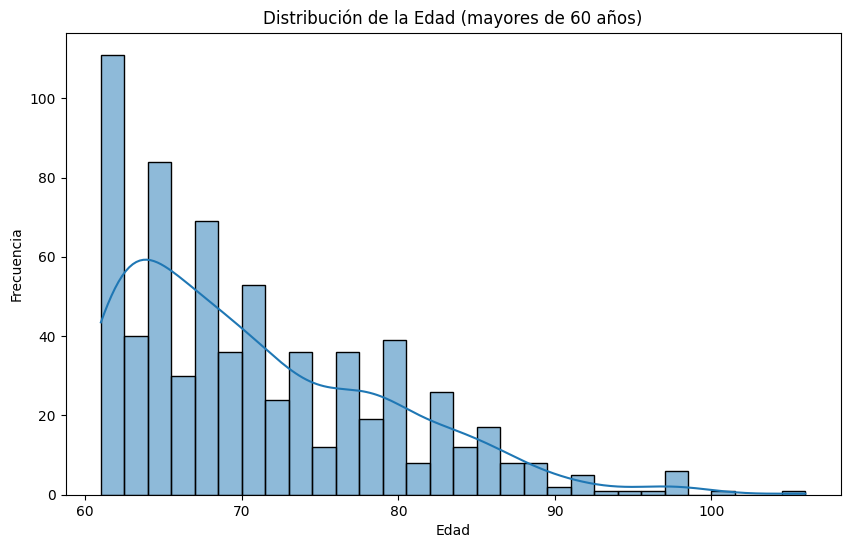

In [51]:
grupo_mayores_60 = df[df['edad_uni'] > 60]
plt.figure(figsize=(10, 6))
sns.histplot(grupo_mayores_60['edad_uni'], bins=30, kde=True)
plt.title('Distribución de la Edad (mayores de 60 años)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


In [56]:
grupo_mayores_60.shape[0]
prop = (grupo_mayores_60.shape[0] / df.shape[0]) * 100
print(f"Número de casos mayores de 60 años: {grupo_mayores_60.shape[0]}")
print(f"Porcentaje de casos mayores de 60 años: {prop:.2f}%")

Número de casos mayores de 60 años: 686
Porcentaje de casos mayores de 60 años: 1.94%


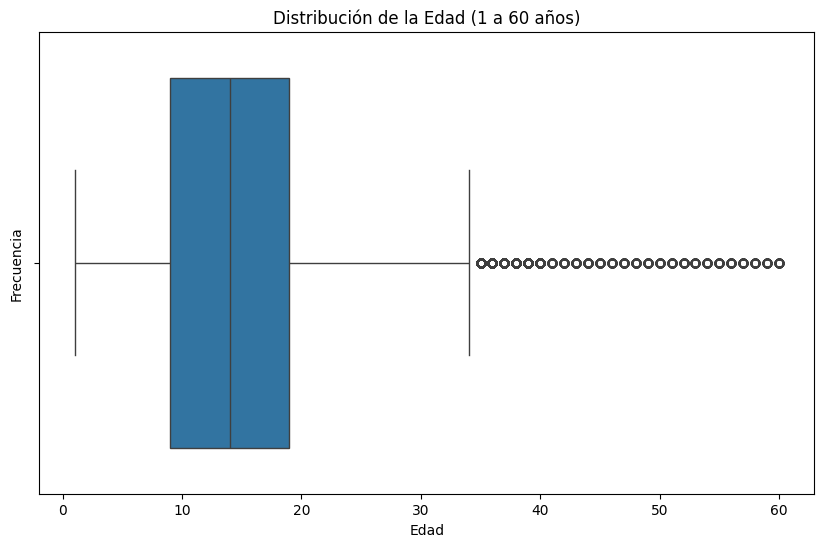

In [ ]:
grupo_normal = df[(df['edad_uni'] >= 1) & (df['edad_uni'] <= 60)]
plt.figure(figsize=(10, 6))
sns.boxplot(x=grupo_normal['edad_uni'])
plt.title('Distribución de la Edad (1 a 60 años)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

In [59]:
grupo_normal['edad_uni'].describe()

count    34294.000000
mean        15.773634
std         10.543739
min          1.000000
25%          9.000000
50%         14.000000
75%         19.000000
max         60.000000
Name: edad_uni, dtype: float64



3.2 Variables del evento/desenlace

Evento / tipo de caso (distribución).

Hospitalización (%).

Mortalidad (%).

3.3 Variables geográficas

Municipio (Atlántico).

Localidad y barrio (Barranquilla).

Distribución de casos en mapas o tablas.

3.4 Variables temporales

Serie de casos por año.

Serie de casos por semana.

Picos y estacionalidad.

4. Exploración bivariada (comparaciones)

4.1 Demografía vs evento/desenlace

Edad × hospitalización.

Sexo × tipo de caso.

Aseguradora × mortalidad.

4.2 Geografía vs desenlace

Municipios/localidades con mayor hospitalización o mortalidad.

Tasas de casos por 100.000 hab.

4.3 Temporalidad vs desenlace

Hospitalización y mortalidad por año y semana.

Comparaciones antes/después de picos epidémicos.

5. Pruebas estadísticas

Pruebas de proporción:

Diferencia en proporciones de hospitalización por sexo.

Diferencia en proporciones de mortalidad entre municipios/localidades.

Chi-cuadrado de independencia:

Sexo × tipo de caso.

Edad (categorías) × hospitalización.

Municipio × mortalidad.

Pruebas de medias:

Diferencia en promedio de edad entre hospitalizados vs no hospitalizados.

Diferencia en diferencia de días (síntomas→consulta) por municipio.

6. Análisis multivariado

Correlación entre variables numéricas

Edad, diferencia de días, semana.

Heatmap de correlaciones.

Análisis de correspondencias múltiples (ACM/MCA)

Para variables categóricas: sexo, etnia, aseguradora, municipio/localidad.

Ver si aparecen perfiles de pacientes.

Clustering exploratorio (opcional)

Agrupar barrios/localidades por perfil de casos.

7. Resumen y hallazgos clave

Principales patrones encontrados.

Variables críticas para explicar hospitalización y mortalidad.

Brechas de información (faltantes o inconsistencias).